In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from math import sqrt

Text(0.5, 1.0, 'after')

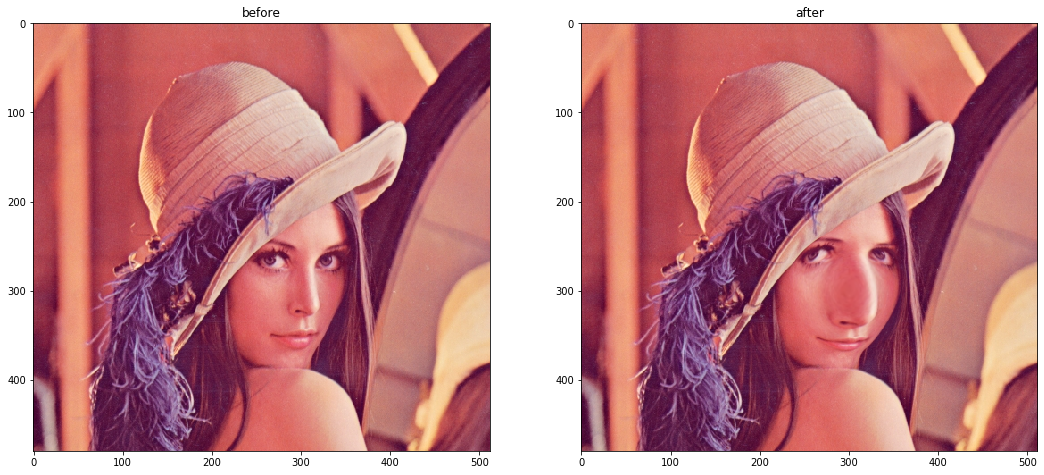

In [3]:
def reshape(src, cx, cy, r, strength):
    map_x = np.zeros((src.shape[0], src.shape[1]), dtype=np.float32)
    map_y = np.zeros((src.shape[0], src.shape[1]), dtype=np.float32)
        
    for y in range(map_x.shape[0]):
        for x in range(map_x.shape[1]):
            dx, dy = x-cx, y-cy
            distanceSquared = dx * dx + dy * dy
            rx, ry = 1.0, 1.0
            
            if 0 < distanceSquared < r * r:
                distance = sqrt(distanceSquared)
                rx = (distance / r) ** strength
                ry = (distance / r) ** strength
            
            map_x[y,x] = rx*dx + cx
            map_y[y,x] = ry*dy + cy
    return cv2.remap(src, map_x, map_y, cv2.INTER_LINEAR)


src = cv2.imread("lenna.jpg")
dst = reshape(src, 300, 300, 70, 0.7)

plt.rcParams['figure.figsize'] = (18.0, 12.0)

plt.subplot(121)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title("before")

plt.subplot(122)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title("after")